# Configurações

In [1]:
#@title URL da imagem utilizada nas atividades
url_img = "http://optipng.sourceforge.net/pngtech/img/lena.png" # @param {type: "string"}

# Exercício 2.2.1 - Negativo de uma Região

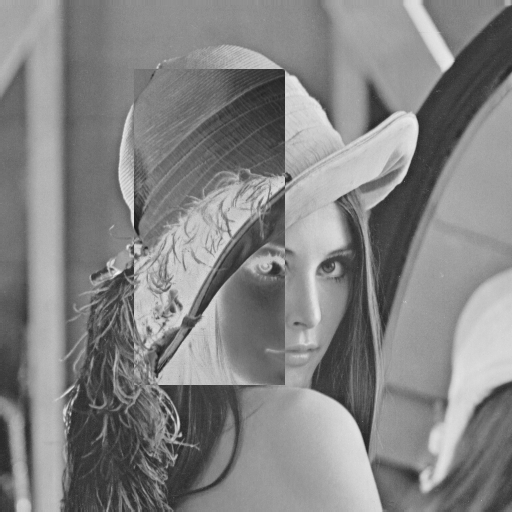

In [2]:
# Importação do OpenCV
import cv2
# Importação de utilidade para exibição da imagem
from google.colab.patches import cv2_imshow
# Importação de urllib para permitir download da imagem
import urllib.request
# Importação do numpy
import numpy as np

# Carrega a imagem a partir da URL definida
resp = urllib.request.urlopen(url_img)
img_array = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
# Obtém o tamanho da imagem
altura, comprimento = img.shape[:2]

p1_x = 385 #@param {type:"slider", min:0, max:512, step:1}
p1_y = 285 #@param {type:"slider", min:0, max:512, step:1}
p2_x = 69 #@param {type:"slider", min:0, max:512, step:1}
p2_y = 134 #@param {type:"slider", min:0, max:512, step:1}

mensagem = (
    'Coordenada %(eixo)s de %(ponto)s inválida. '
    'Máximo valor permitido = %(valor)d'
)

# Faz verificações nos pontos especificados
assert p1_x <= altura, \
    mensagem % {'eixo': 'x', 'ponto': 'p1', 'valor': altura}
assert p1_y <= altura, \
    mensagem % {'eixo': 'y', 'ponto': 'p1', 'valor': comprimento}
assert p2_x <= altura, \
    mensagem % {'eixo': 'x', 'ponto': 'p2', 'valor': altura}
assert p2_y <= altura, \
    mensagem % {'eixo': 'y', 'ponto': 'p2', 'valor': comprimento}

# Garante a ordem correta dos pontos
cp1_x = min(p1_x, p2_x)
cp2_x = max(p1_x, p2_x)
cp1_y = min(p1_y, p2_y)
cp2_y = max(p1_y, p2_y)

# Aplicação da operação
img[cp1_x:cp2_x, cp1_y:cp2_y] = 255 - img[cp1_x:cp2_x, cp1_y:cp2_y]

# Exibição da imagem modificada
cv2_imshow(img)

# Exercício 2.2.2 - Troca de quadrantes

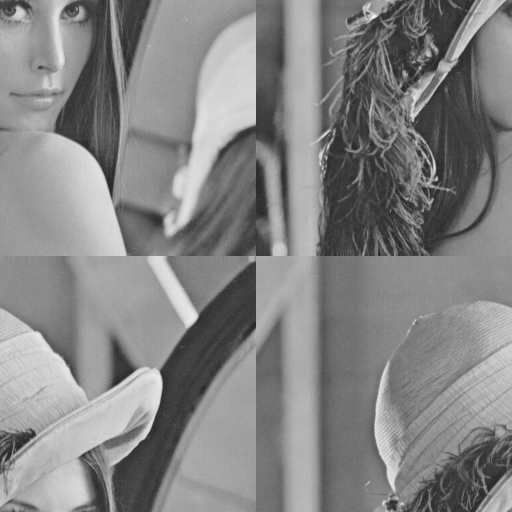

In [3]:
#@title Troca de quadrantes

# Importação do OpenCV
import cv2
# Importação de utilidade para exibição da imagem
from google.colab.patches import cv2_imshow
# Importação de urllib para permitir download da imagem
import urllib
# Importação do numpy
import numpy as np

# Carrega a imagem a partir da URL definida
resp = urllib.request.urlopen(url_img)
img_array = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
# Obtém o tamanho da imagem
altura, comprimento = img.shape[:2]

# Troca das regiões da imagem
nova_img = np.zeros((altura, comprimento))
nova_img[:(altura//2), :(comprimento//2)] = (
    img[(altura//2):, (comprimento//2):]
)
nova_img[(altura//2):, :(comprimento//2)] = (
    img[:(altura//2), (comprimento//2):]
)
nova_img[:(altura//2), (comprimento//2):] = (
    img[(altura//2):, :(comprimento//2)]
)
nova_img[(altura//2):, (comprimento//2):] = (
    img[:(altura//2), :(comprimento//2)]
)

# Exibição da imagem modificada
cv2_imshow(nova_img)

# Exercício 3.2.1 - Rotulação de objetos na cena


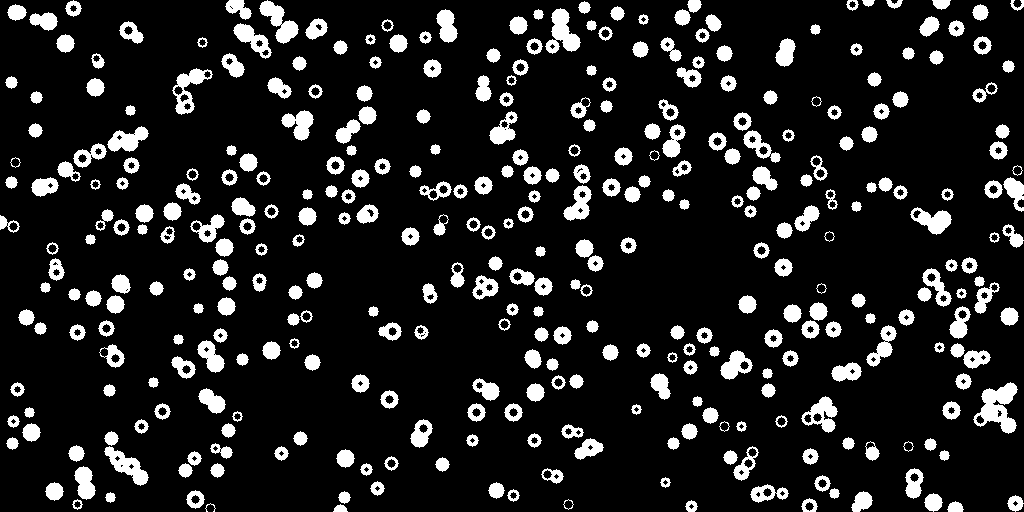

In [4]:
#@title Geração da cena
# Importação do OpenCV
import cv2
# Importação de utilidade para exibição da imagem
from google.colab.patches import cv2_imshow
# Importação de urllib para permitir download da imagem
import urllib
# Importação do numpy
import numpy as np

# Gera uma cena
cena = np.zeros((512, 1024), dtype=np.uint8)

quantidade_objetos = 500 #@param {type:"slider", min:0, max:500, step:1}

# Adiciona vários objetos na imagem
for i in range(quantidade_objetos):
    x, y = np.random.randint(0, 1024), np.random.randint(0, 512)

    cena = cv2.circle(cena, (x, y), np.random.randint(5, 10), 255, -1)

    if np.random.randint(0, 2):
        cena = cv2.circle(cena, (x, y), np.random.randint(2, 5), 0, -1)

# Exibição da cena criada
cv2_imshow(cena)

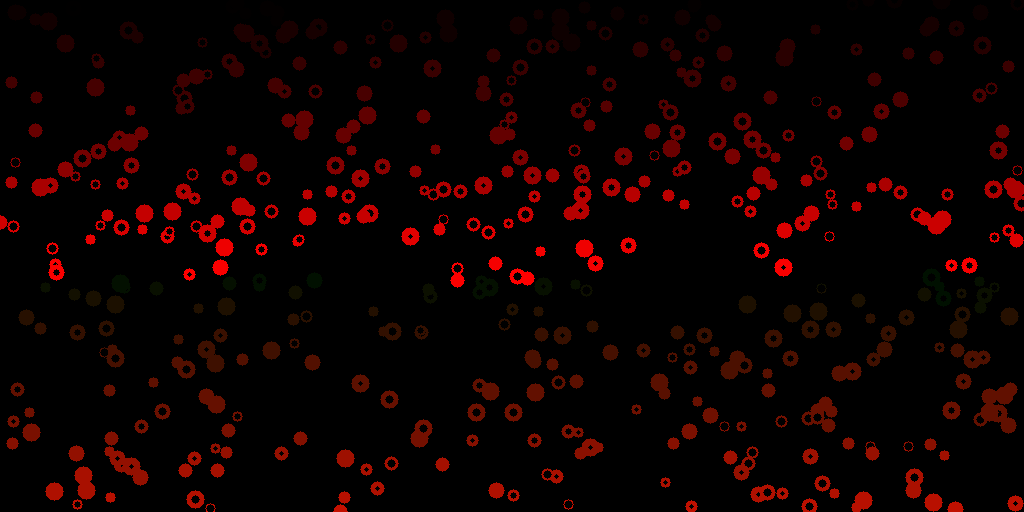

Número de objetos encontrados = 460


In [5]:
#@title Rotulagem

numero_objetos = 0
altura, comprimento = cena.shape[:2]
imagem_rotulada = cv2.cvtColor(cena, cv2.COLOR_GRAY2RGB)

def numero_cor(numero):
    return (numero // (255 * 255), ((numero // 255) * 16) % 255, numero % 255)

for x in range(altura):
    for y in range(comprimento):
        if imagem_rotulada[x, y, 0] == 255:
            numero_objetos += 1
            cv2.floodFill(
                imagem_rotulada, None, (y, x), numero_cor(numero_objetos)
            )

cv2_imshow(imagem_rotulada)
print(f'Número de objetos encontrados = {numero_objetos}')

# Exercício 3.2.2 - Rotulação de objetos na cena que não tocam as bordas e contagem de objetos com e sem "buracos"

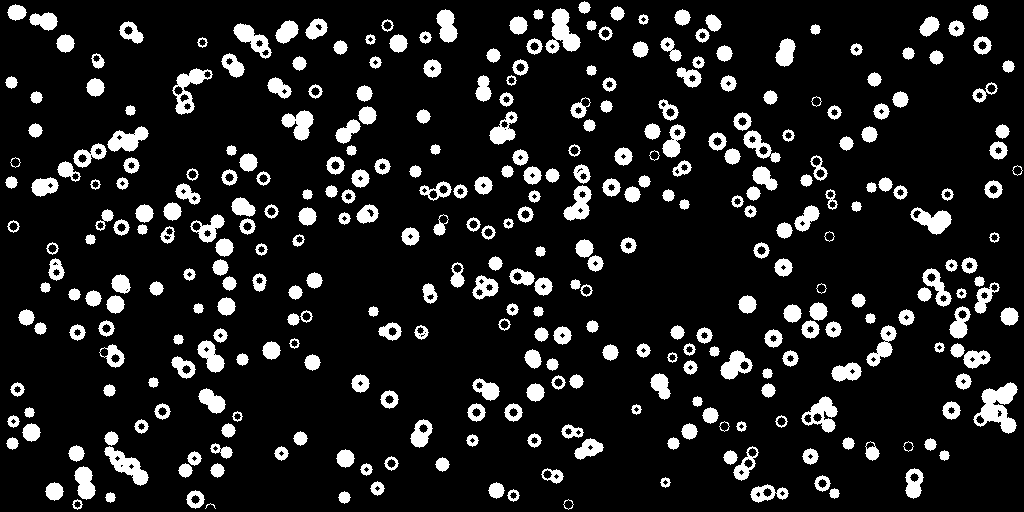

Número de objetos que tocam a borda = 21


In [6]:
#@title Remoção de objetos que tocam a borda

numero_objetos_borda = 0
altura, comprimento = cena.shape[:2]
imagem_processada = cv2.cvtColor(cena, cv2.COLOR_GRAY2RGB)

def numero_cor(numero):
    return (numero // (255 * 255), ((numero // 255) * 16) % 255, numero % 255)

# Remoção de objetos que tocam a borda
for x in range(altura):
    for y in range(comprimento):
        if imagem_processada[x, y, 0] == 255 and (
            x in [0, altura - 1] or y in [0, comprimento - 1]
        ):
            numero_objetos_borda += 1
            cv2.floodFill(
                imagem_processada, None, (y, x), (0, 0, 0)
            )

cv2_imshow(imagem_processada)
print(f'Número de objetos que tocam a borda = {numero_objetos_borda}')

# Atividade 4.2.1 - Equalização de histograma

In [7]:
#@title Obtenção da imagem

from IPython.display import Image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

nome_imagem = "photo.jpg" # @param

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


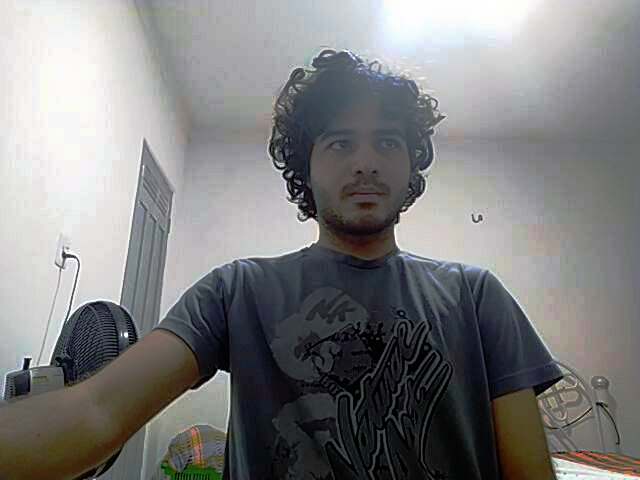

In [8]:
#@title Obtenção da imagem equalizada todos os canais

from collections import Counter

original = cv2.imread(nome_imagem)
nova_imagem = np.zeros(original.shape, dtype=np.uint8)

def calcular_histograma(img):
    histograma = Counter(img.ravel())
    return np.array([histograma.get(i, 0) for i in range(256)])

def equalizar_histograma(img):
    histograma = calcular_histograma(img)
    histograma_acumulado = np.cumsum(histograma, axis=0)
    return (
        histograma_acumulado[img] / np.max(histograma_acumulado) * 255
    ).astype(np.uint8)

for i in range(3):
    nova_imagem[:, :, i] = equalizar_histograma(original[:,:,i])

cv2_imshow(nova_imagem)

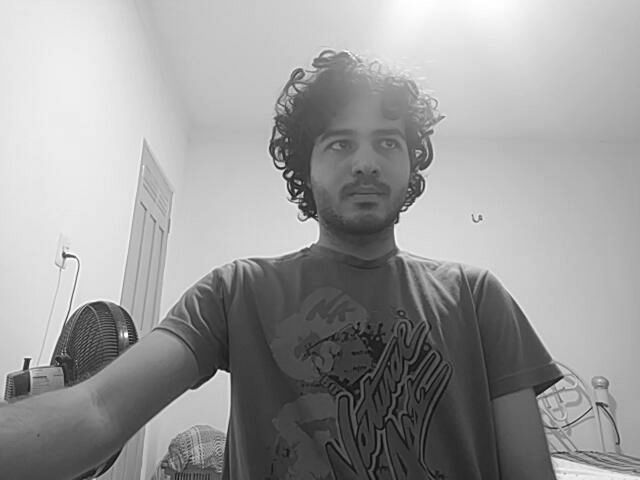

In [9]:
#@title Obtenção da imagem em tons de cinza
original = cv2.imread(nome_imagem, cv2.IMREAD_GRAYSCALE)
cv2_imshow(original)

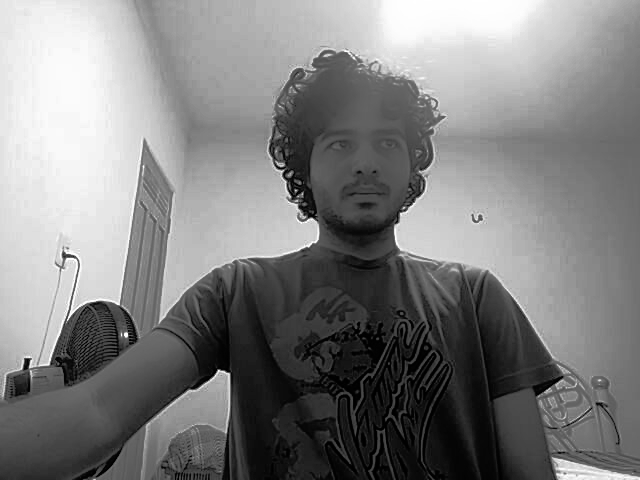

In [10]:
#@title Obtenção da imagem em tons de cinza equalizada
nova_imagem = equalizar_histograma(original)
cv2_imshow(nova_imagem)

# Atividade 4.2.2 - Deteção de movimento através do histograma

<IPython.core.display.Javascript object>

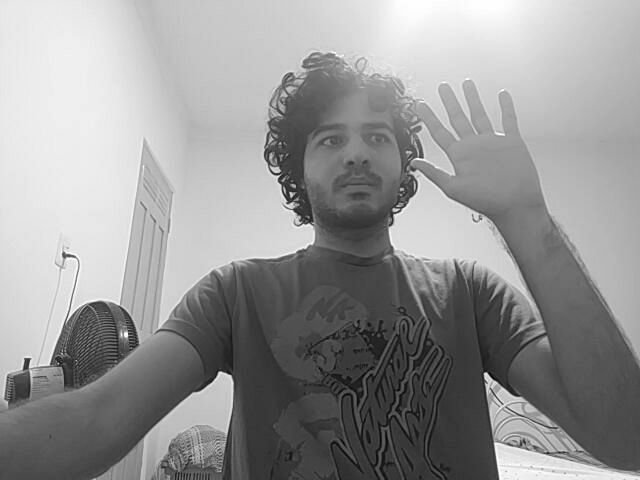

<IPython.core.display.Javascript object>

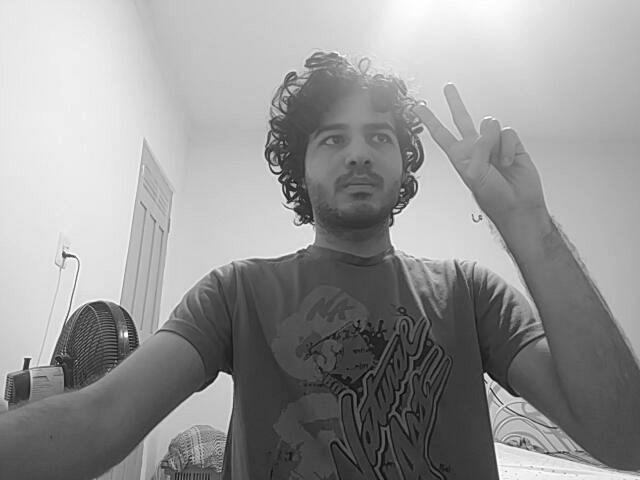

In [11]:
#@title Obtenção de imagens

nome_imagem_1 = "imagem-1.jpg" # @param {type: "string"}
nome_imagem_2 = "imagem-2.jpg" # @param {type: "string"}

filename = take_photo()
imagem_1 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
cv2_imshow(imagem_1)
filename = take_photo()
imagem_2 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
cv2_imshow(imagem_2)


Movimento detectado!


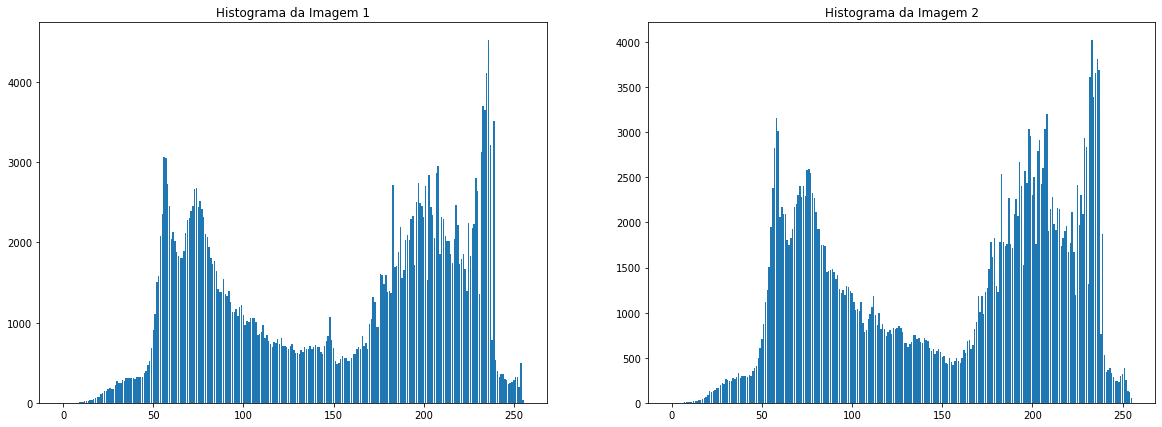

In [12]:
#@title Deteção de movimento entre as imagens 1 e 2
import matplotlib.pyplot as plt

histograma_imagem_1 = calcular_histograma(imagem_1)
histograma_imagem_2 = calcular_histograma(imagem_2)

plt.figure(0, (20, 7))
plt.subplot(1, 2, 1)
plt.title('Histograma da Imagem 1')
plt.bar(np.arange(0, 256), histograma_imagem_1)
plt.subplot(1, 2, 2)
plt.title('Histograma da Imagem 2')
plt.bar(np.arange(0, 256), histograma_imagem_2)

diferenca = np.sum(np.abs(histograma_imagem_1 - histograma_imagem_2))

if diferenca > 30000:
    print('Movimento detectado!')

# Exercício 5.2 - Aplicação de filtros espaciais

<IPython.core.display.Javascript object>

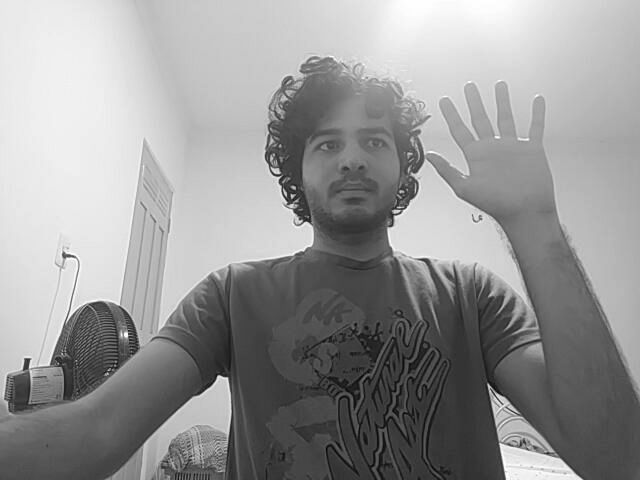

In [14]:
#@title Obtenção da imagem

import cv2

nome_imagem = "imagem.jpg" # @param {type: "string"}

filename = take_photo()
imagem = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
cv2_imshow(imagem)

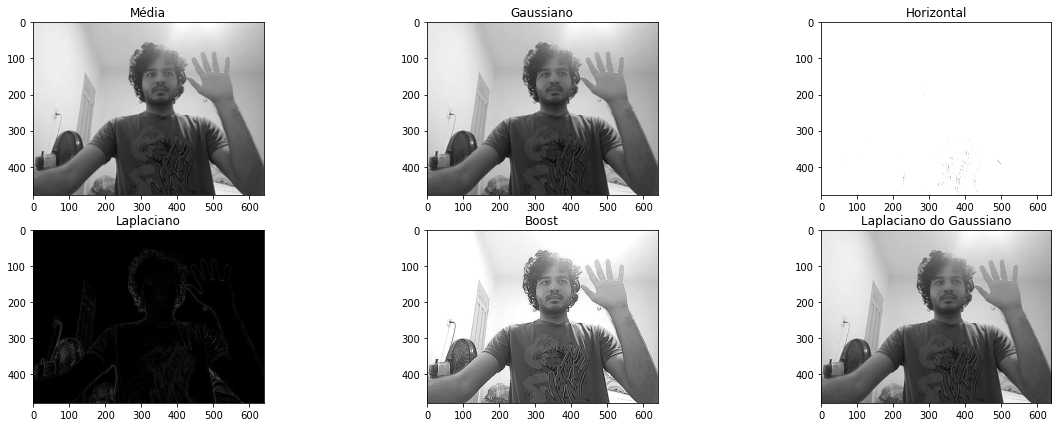

In [15]:
#@title Aplicação dos filtros
import numpy as np

from scipy.signal import convolve2d

filtros = {
    'Média': np.array([
        0.1111, 0.1111, 0.1111, 0.1111, 0.1111,0.1111, 0.1111, 0.1111, 0.1111
    ]).reshape(3, 3),
    'Gaussiano': np.array([
        0.0625, 0.125,  0.0625, 0.125, 0.25, 0.125,  0.0625, 0.125,  0.0625
    ]).reshape(3, 3),
    'Horizontal': np.array([
        -1, 0, 1, -2, 0, 22, -1, 0, 1
    ]).reshape(3, 3),
    'Laplaciano': np.array([
        0, -1, 0, -1, 4, -1, 0, -1, 0
    ]).reshape(3, 3),
    'Boost': np.array([
        0, -1, 0, -1, 5.2, -1, 0, -1, 0
    ]).reshape(3, 3)
}

filtros['Laplaciano do Gaussiano'] = convolve2d(
    filtros['Laplaciano'], filtros['Gaussiano'], mode='same'
)

plt.figure(0, (20, 7))

for i, (nome, mascara) in enumerate(filtros.items()):
    plt.subplot(2, 3, i + 1)
    plt.title(nome)
    nova_img = cv2.filter2D(imagem, -1, mascara)
    plt.imshow(nova_img, cmap='gray')

# Exercício 6.1.1 - Tilt-shift de Imagem

<IPython.core.display.Javascript object>

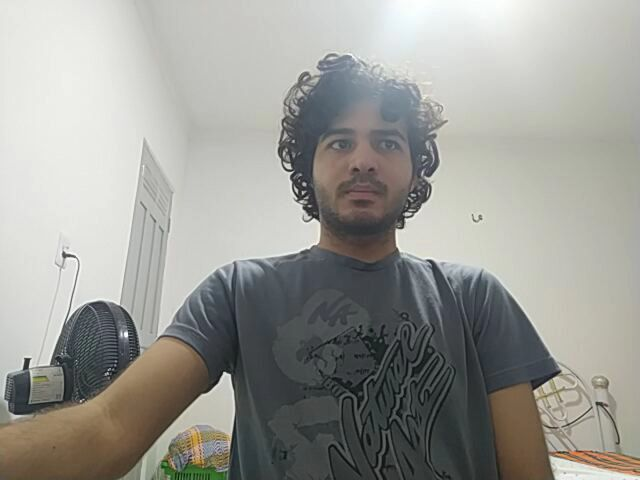

In [16]:
#@title Obtenção da imagem
from google.colab.patches import cv2_imshow
import cv2

nome_imagem = "imagem.jpg" # @param {type: "string"}

filename = take_photo()
imagem = cv2.imread(filename)
cv2_imshow(imagem)

In [17]:
#@title Definição de função de utilidade

import numpy as np
import cv2

def tilt_shift(imagem, altura, forca_decaimento, posicao_vertical):
    altura_img, largura_img = imagem.shape[:2]

    assert altura_img > altura, 'Altura inválida'
    assert (posicao_vertical - (altura // 2)) > 0, 'Posição vertical inválida'

    centro = altura_img // 2 - posicao_vertical

    l1 = centro - altura // 2
    l2 = centro + altura // 2

    x = np.linspace(-altura_img // 2, altura_img // 2, altura_img)

    alpha = 0.5 * (
        np.tanh((x - l1) / forca_decaimento) - 
        np.tanh((x - l2) / forca_decaimento)
    )

    filtro = np.array([
        0.0625, 0.125,  0.0625, 0.125, 0.25, 0.125,  0.0625, 0.125,  0.0625
    ]).reshape(3, 3)

    imagem_borrada = imagem[:, :, :]

    for i in range(30):
         imagem_borrada = cv2.filter2D(imagem_borrada, -1, filtro)

    nova_img = (
        alpha[:, None, None] * imagem + 
        (1 - alpha[:, None, None]) * imagem_borrada
    )

    return np.clip(nova_img, 0, 255).astype(np.uint8)

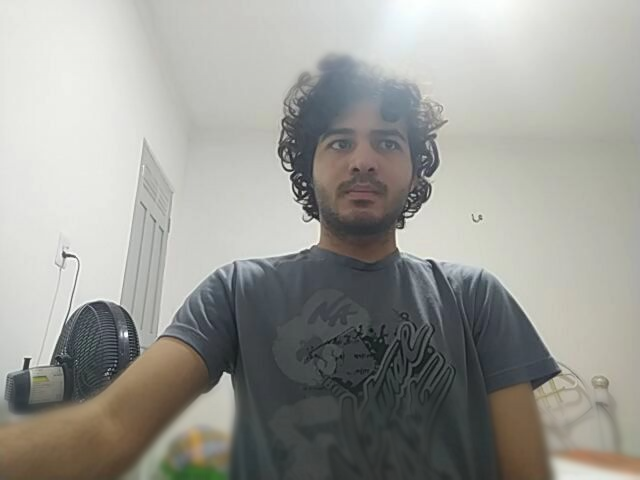

In [18]:
#@title Aplicação do filtro

altura = 300 #@param {type:"slider", min:60, max:420, step:1}
forca_decaimento = 20 #@param {type:"slider", min:1, max:40, step:0.1}
posicao_vertical = 240 #@param {type:"slider", min:120, max:360, step:1}

cv2_imshow(tilt_shift(imagem, altura, forca_decaimento, posicao_vertical))

# Exercício 6.1.2 - Tilt-shift de Vídeo

In [19]:
#@title Obtenção do video
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving video.mp4 to video.mp4
User uploaded file "video.mp4" with length 9471161 bytes


In [ ]:
#@title Manipulação do vídeo
nome_arquivo = "video.mp4" #@param {type:"string"}
percentual_altura = 60 #@param {type:"slider", min:40, max:90, step:1}
forca_decaimento = 20 #@param {type:"slider", min:1, max:40, step:0.1}
posicao_vertical_relativa_centro = 0 #@param {type:"slider", min:-300, max:300, step:1}

cap = cv2.VideoCapture(nome_arquivo)

# Obtém o primeiro frame
ret, quadro = cap.read()
altura_img, largura_img = quadro.shape[:2]

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
saida = cv2.VideoWriter('saida.mp4', fourcc, 20, (altura_img, largura_img))

altura = int(percentual_altura / 100 * altura_img)
posicao_vertical = (
    posicao_vertical_relativa_centro + altura_img // 2
)

contador = 0

while cap.isOpened():
    contador += 1
    if contador % 3 != 0:
        continue

    if contador % 60 == 0:
        print(contador // 60)
    
    ret, quadro = cap.read()

    if not ret:
        break

    saida.write(
        tilt_shift(quadro, altura, forca_decaimento, posicao_vertical)
    )

saida.release()